# 数据探索性分析

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import pdvega
import warnings
warnings.filterwarnings('ignore')

### 1.加载数据，处理年龄

In [165]:
data = pd.read_csv('yj_aki_finaleigen.csv')
index = data[data['age']>200].index
data['age'].loc[index] = 91.4
data.describe()

creat    classlabel     icustay_id        hr_max        hr_min  \
count  11879.000000  11879.000000   11879.000000  11879.000000  11879.000000   
mean       1.218369      0.356596  250296.049247    102.398426     73.313999   
std        0.867287      0.479014   28823.074628     20.943439     14.731939   
min        0.000000      0.000000  200003.000000     38.000000      4.000000   
25%        0.700000      0.000000  225528.000000     88.000000     63.000000   
50%        0.900000      0.000000  250747.000000    100.000000     72.000000   
75%        1.500000      1.000000  275230.000000    115.000000     83.000000   
max       13.900000      1.000000  299995.000000    245.000000    140.000000   

             hr_avg        hr_std        hr_mid         hr_25         hr_75  \
count  11879.000000  11839.000000  11879.000000  11879.000000  11879.000000   
mean      86.076979      7.980171     85.505388     80.668133     90.868844   
std       15.461560      4.553315     15.795106     15.183717     16.765440   
min       36.750000      0.000000     36.000000     32.000000     37.250000   
25%       75.250000      5.017074     74.000000     70.000000     79.250000   
50%       85.264706      6.945209     84.500000     80.000000     90.000000   
75%       96.000000      9.737069     96.000000     90.000000    101.500000   
max      154.397059     46.624584    168.500000    145.000000    175.250000   

           ...            gcs_mid        gcs_25        gcs_75       height  \
count      ...       11806.000000  11806.000000  11806.000000  7361.000000   
mean       ...          11.833347     11.320706     12.237866   169.341117   
std        ...           3.867001      4.091053      3.640771    16.048723   
min        ...           3.000000      3.000000      3.000000     5.080000   
25%        ...           9.000000      8.000000     10.000000   162.560000   
50%        ...          14.000000     13.000000     14.750000   170.180000   
75%        ...          15.000000     15.000000     15.000000   177.800000   
max        ...          15.000000     15.000000     15.000000   444.500000   

             weight          vaso          vent           age  \
count  11543.000000  11879.000000  11879.000000  11879.000000   
mean      81.752782      0.173415      0.178550     64.689781   
std       23.848675      0.378622      0.382992     17.260434   
min        1.000000      0.000000      0.000000     18.022100   
25%       66.000000      0.000000      0.000000     53.599550   
50%       78.600000      0.000000      0.000000     66.872600   
75%       93.000000      0.000000      0.000000     78.340950   
max      295.000000      1.000000      1.000000     91.400000   

       hospital_expire_flag       lostime  
count          11879.000000  11879.000000  
mean               0.185706      3.845069  
std                0.388885      2.192028  
min                0.000000      1.000012  
25%                0.000000      1.618079  
50%                0.000000      3.423206  
75%                0.000000      6.274062  
max                1.000000      6.999954  

[8 rows x 81 columns]

### 2.  缺失数据统计

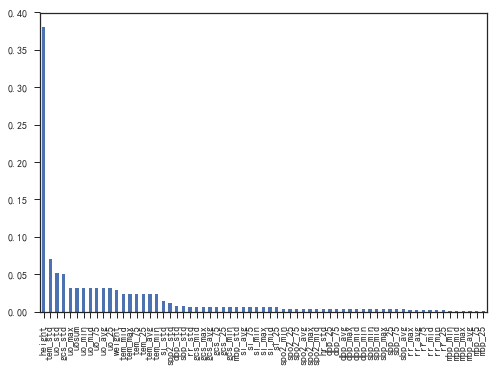

In [75]:
missing = data.isnull().sum()
missing.sort_values(inplace = True,ascending = False)
missing = missing[missing>0]
types = data[missing.index].dtypes
percent = (data[missing.index].isnull().sum()/data[missing.index].isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([missing,percent,types],axis = 1,keys = ['total','percent','types'])
missing_data.sort_values('total',ascending = False,inplace = True)
missing_data['percent'].plot.bar()
plt.show()

### 3. 分类变量分析

In [63]:
data.describe(include= [np.object])

akistarttime gender ethnicity admission_type
count                 11879  11879     11879          11879
unique                11869      2        38              3
top     2118-06-20 04:00:00      M     WHITE      EMERGENCY
freq                      2   6653      8283           9826

分类变量为'gender'和'admission_type'

## 4. 单变量分析

### 4.1 患病情况统计

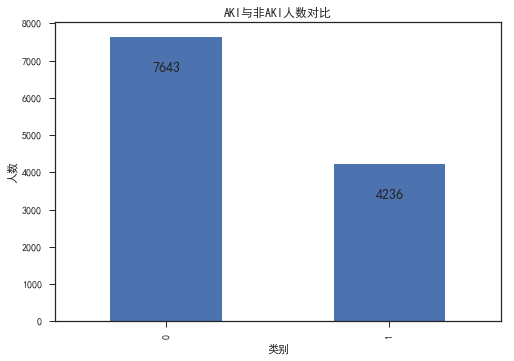

(Int64Index([0, 1], dtype='int64'), array([7643, 4236], dtype=int64))

In [64]:
import seaborn as sns
plt.rcParams["font.sans-serif"]=["SimHei"]
grouped_values = data['classlabel'].value_counts()
x = grouped_values.index
y = grouped_values.values
grouped_values.plot.bar()
plt.xlabel('类别')
plt.ylabel('人数')
plt.title('AKI与非AKI人数对比')
for a,b in zip(x,y):
    plt.text(a, b-1000, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.show()
grouped_values
x,y

其中，发生AKI的4236人，未发生AKI7643人

### 4.2 年龄分布

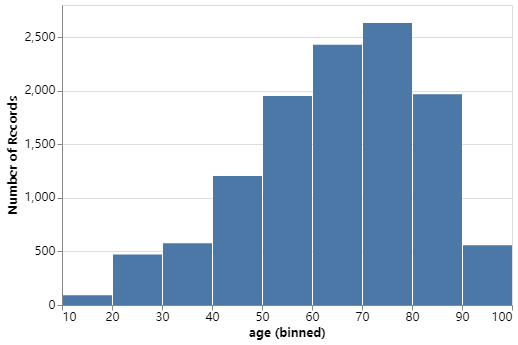

In [76]:
data['age'].vgplot.hist()

### 4.3 性别统计

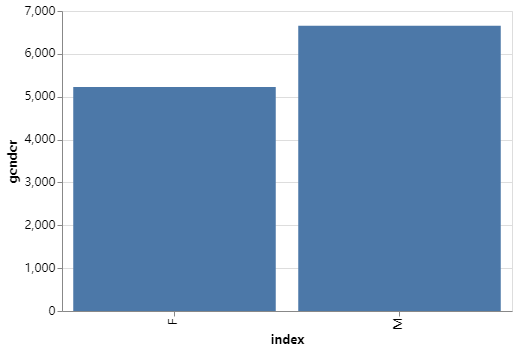

In [77]:
data['gender'].value_counts().vgplot.bar()

女性：5226人，男性6653人

### 4.4 入ICU类型统计

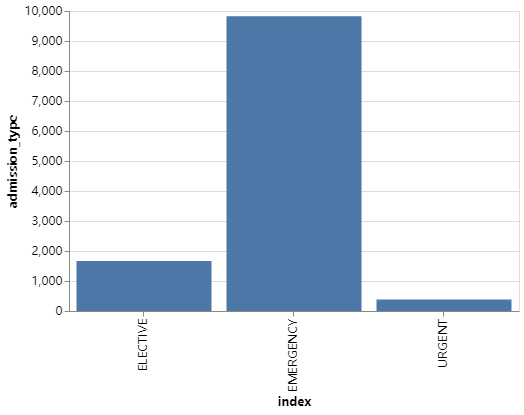

In [78]:
data['admission_type'].value_counts().vgplot.bar()

EMERGENCY:9826 ELECTIVE:1670 URGENT:383

### 4.5 机械通气统计

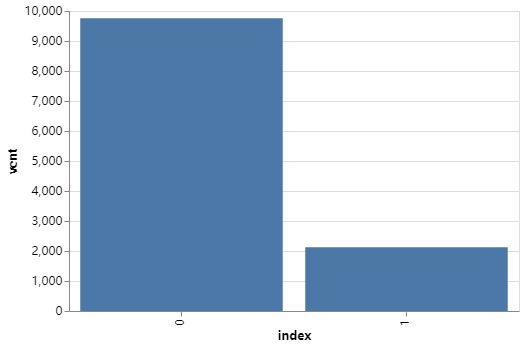

In [152]:
data['vent'].value_counts().vgplot.bar()

机械通气：2121人，未机械通气：9758人

### 4.6 血管活性药

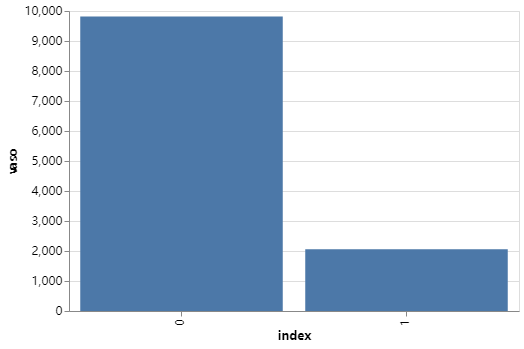

In [69]:
data['vaso'].value_counts().vgplot.bar()

使用血管活性药：2060人，未使用血管活性药：9819人

### 4.7预后统计

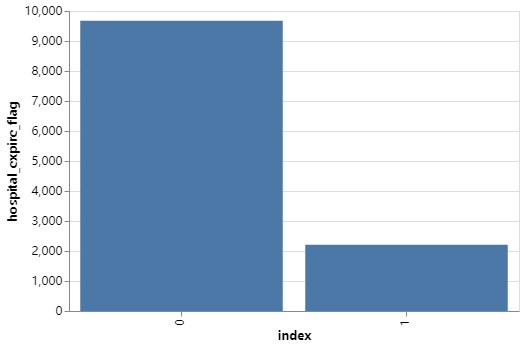

In [131]:
data['hospital_expire_flag'].value_counts().vgplot.bar()

存活：9673人，死亡：2206人

## 5. 多变量分析

### 5.1 性别与是否患AKI的关系

In [80]:
pd.crosstab(data['gender'],data['classlabel'])

classlabel     0     1
gender                
F           3457  1769
M           4186  2467

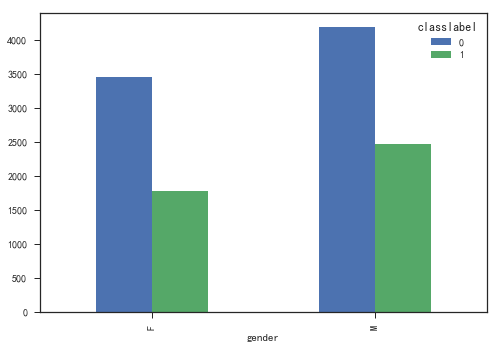

In [87]:
pd.crosstab(data['gender'],data['classlabel']).plot(kind='bar')
plt.show()

男性患病比例：37  女性患病比例：33.8

### 5.2 是否发生AKI与预后的关系

In [145]:
pd.crosstab(data['hospital_expire_flag'],data['classlabel'])

classlabel               0     1
hospital_expire_flag            
0                     6386  3287
1                     1257   949

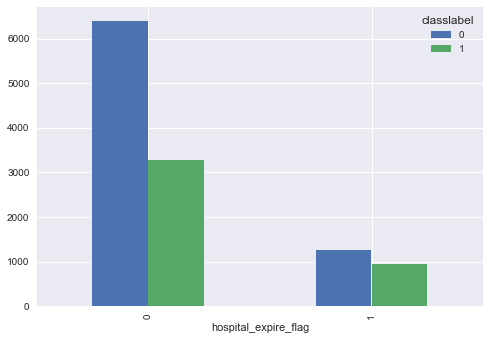

In [146]:
pd.crosstab(data['hospital_expire_flag'],data['classlabel']).plot(kind = "bar")
plt.show()

### 5.3是否发生AKI与种族关系

In [82]:
pd.crosstab(data['ethnicity'],data['classlabel'])

classlabel                                     0     1
ethnicity                                             
AMERICAN INDIAN/ALASKA NATIVE                  2     2
ASIAN                                        115    49
ASIAN - ASIAN INDIAN                           7     5
ASIAN - CAMBODIAN                              1     2
ASIAN - CHINESE                               36    18
ASIAN - FILIPINO                               3     2
ASIAN - JAPANESE                               1     1
ASIAN - KOREAN                                 0     2
ASIAN - OTHER                                  3     1
ASIAN - THAI                                   0     1
ASIAN - VIETNAMESE                             7     4
BLACK/AFRICAN                                 13     1
BLACK/AFRICAN AMERICAN                       449   259
BLACK/CAPE VERDEAN                            20     6
BLACK/HAITIAN                                 10     3
HISPANIC OR LATINO                           179    86
HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)     2     0
HISPANIC/LATINO - COLOMBIAN                    2     1
HISPANIC/LATINO - CUBAN                        0     1
HISPANIC/LATINO - DOMINICAN                   11     6
HISPANIC/LATINO - GUATEMALAN                   4     1
HISPANIC/LATINO - MEXICAN                      3     1
HISPANIC/LATINO - PUERTO RICAN                23     9
HISPANIC/LATINO - SALVADORAN                   2     1
MIDDLE EASTERN                                 8     3
MULTI RACE ETHNICITY                          13    10
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      2     2
OTHER                                        193    94
PATIENT DECLINED TO ANSWER                    72    56
PORTUGUESE                                     8     4
SOUTH AMERICAN                                 1     0
UNABLE TO OBTAIN                             172   112
UNKNOWN/NOT SPECIFIED                        911   526
WHITE                                       5334  2949
WHITE - BRAZILIAN                              7     2
WHITE - EASTERN EUROPEAN                       3     0
WHITE - OTHER EUROPEAN                        12     8
WHITE - RUSSIAN                               14     8

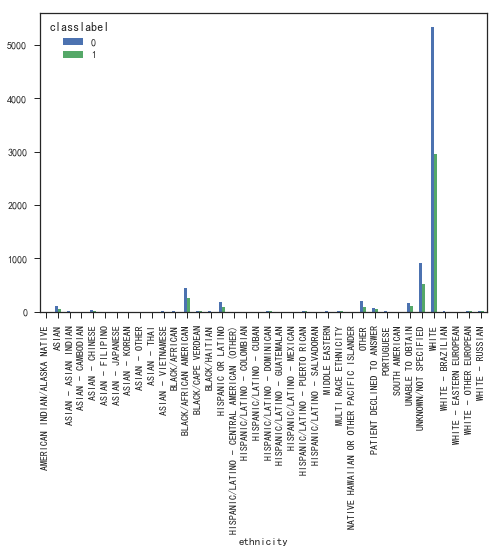

In [83]:
pd.crosstab(data['ethnicity'],data['classlabel']).plot(kind = "bar")
plt.show()

### 5.4 相关性分析

#### 5.4.1 处理哑变量

In [98]:
dummy_feature = data[['gender','admission_type']]
dummies = pd.get_dummies(dummy_feature,prefix=['sex','type'])
data = data.drop(['gender', 'admission_type'], axis=1)
datawithdummy = dummies.join(data)
data = datawithdummy
data.head()

sex_F  sex_M  type_ELECTIVE  type_EMERGENCY  type_URGENT  \
0      0      1              0               1            0   
1      1      0              0               1            0   
2      1      0              1               0            0   
3      1      0              0               1            0   
4      0      1              0               1            0   

          akistarttime  creat  classlabel  icustay_id  hr_max    ...     \
0  2100-06-15 07:25:00    0.6           0      293407   115.0    ...      
1  2100-06-19 14:00:00    0.6           0      222148   113.0    ...      
2  2100-07-03 03:45:00    2.4           1      200237    91.0    ...      
3  2100-07-08 01:54:00    3.2           1      293960    96.0    ...      
4  2100-07-20 04:42:00    3.9           1      260723    94.0    ...      

   gcs_25  gcs_75  height  weight  vaso  vent      age  ethnicity  \
0    9.00    9.00     NaN    39.0     0     1  72.1277      WHITE   
1   12.25   12.75     NaN    54.4     0     0  71.6298      WHITE   
2   15.00   15.00     NaN     NaN     0     0  82.2400      WHITE   
3   15.00   15.00     NaN   126.8     0     0  60.6383      WHITE   
4   14.50   15.00     NaN    48.0     0     0  84.1707      WHITE   

   hospital_expire_flag   lostime  
0                     1  6.239780  
1                     0  5.377326  
2                     0  1.106030  
3                     0  1.452523  
4                     1  1.231007  

[5 rows x 88 columns]

#### 5.4.2相关性分析

In [129]:
label = data['classlabel']
data.drop(['classlabel'],axis=1, inplace=True)
data1 = data.iloc[:,0:42]
data2 = data.iloc[:,42:88]
data1['label']=label
data2['label']= label

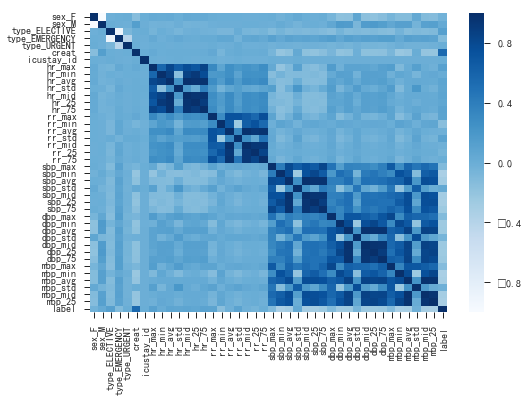

In [130]:
core1 = data1.corr()
sn.heatmap(core1,cmap="Blues")
plt.show()

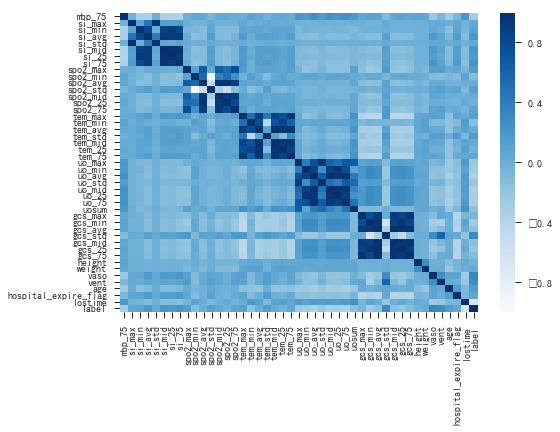

In [131]:
core2 = data2.corr()
sn.heatmap(core2,cmap="Blues")
plt.show()

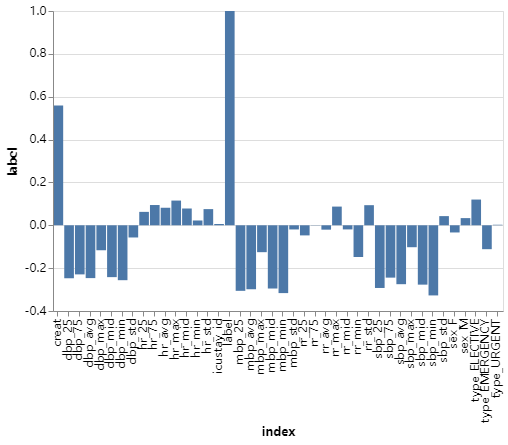

In [132]:
core1['label'].vgplot.bar()

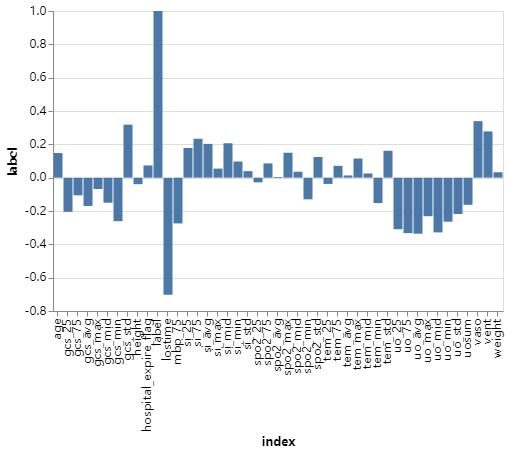

In [133]:
core2['label'].vgplot.bar()

### 5.5 年龄与AKI关系

#### 5.5.1 直方图

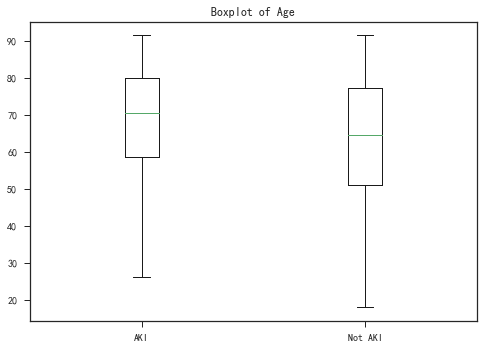

In [125]:
data['classlabel'] = label
age0 = data['age'][data['classlabel']==0]
age1 = data['age'][data['classlabel']==1]
plt.boxplot((age1,age0),labels=('AKI','Not AKI'))
plt.title("Boxplot of Age")
plt.show()

#### 5.5.2 各年龄段AKI的发病情况

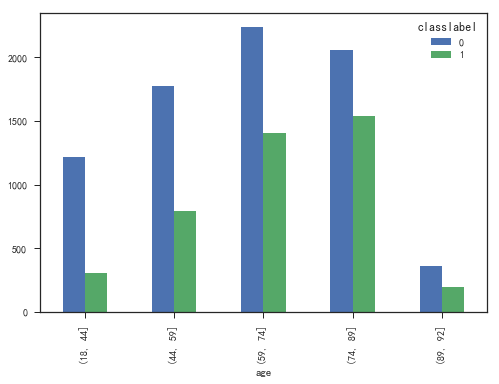

In [156]:
data['age']=pd.cut(data['age'],[18,44,59,74,89,92])
pd.crosstab(data['age'],data['classlabel']).plot(kind="bar")
plt.show()

### 5.6 AKI发生时刻与AKI的关系

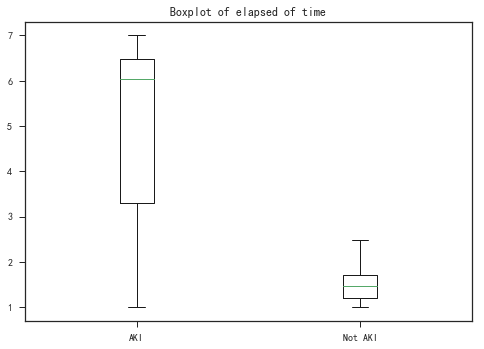

In [153]:
data['classlabel'] = label
los0 = data['lostime'][data['classlabel']==0]
los1 = data['lostime'][data['classlabel']==1]
plt.boxplot((los0,los1),labels=('AKI','Not AKI'))
plt.title("Boxplot of elapsed of time")
plt.show()

## 可视化工具

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
# these two lines are what allow your code to show uo in a notebook
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

In [3]:
trace1 = go.Bar(x = test.index, y = test.values[:,0],name = 'non AKI')
trace2 = go.Bar(x = test.index, y = test.values[:,1],name = 'AKI')
data = [trace1,trace2]
layout = go.Layout(title = "Number of ")
fig = dict(data=data,layout=layout)
iplot(fig, filename='bar-direct-labels')

NameError: name 'test' is not defined

In [193]:
trace1

Bar({
    'name': 'non AKI',
    'x': array(['(18, 44]', '(44, 59]', '(59, 74]', '(74, 89]', '(89, 92]'],
               dtype=object),
    'y': array([1216, 1774, 2238, 2055,  360], dtype=int64)
})

In [185]:
test.index

CategoricalIndex(['(18, 44]', '(44, 59]', '(59, 74]', '(74, 89]'], categories=['(18, 44]', '(44, 59]', '(59, 74]', '(74, 89]', '(89, 92]'], ordered=True, name='age', dtype='category')

In [50]:
 score = [0.79846387, 0.81911315, 0.82474857, 0.83016875, 0.83444728, 0.83818673,
 0.84097678, 0.8506907,  0.85777745, 0.86515175, 0.86961572, 0.87182161,
 0.87222138, 0.87320905, 0.87406839, 0.87447327, 0.87513771, 0.87618466,
 0.87579857, 0.87637415, 0.87665539, 0.87809464, 0.87891159, 0.87937737,
 0.87938016, 0.88029894, 0.88120867, 0.88078808, 0.88148384, 0.88067711,
 0.88136221, 0.8817322,  0.88114684, 0.8815443,  0.88141943, 0.88120359,
 0.88186411, 0.88184062, 0.88173676, 0.88185153, 0.88182478, 0.88146663,
 0.88151934, 0.88143736, 0.88208655, 0.8818796,  0.88156613, 0.88185554,
 0.88164209, 0.88204216, 0.88161854, 0.88183667, 0.88186113, 0.88204642,
 0.88176876, 0.88177366, 0.8822457,  0.88211947, 0.88160208, 0.88246363,
 0.88174294, 0.88253737, 0.88213547, 0.8823384,  0.88223037, 0.88202066,
 0.88196546, 0.88177301, 0.8820051,  0.88249875, 0.88247149, 0.88201206,
 0.8823869,  0.88196012, 0.88235646, 0.88206737, 0.88182545, 0.88182545,
 0.88182545, 0.88182545, 0.88182545, 0.88182545]
score = np.array(score)

In [93]:
# score = pd.DataFrame(score,columns =[ 'AUC'])
trace1 = np.linspace(0, 81, 82)
trace2 = np.array(score)

trace0 = go.Scatter(
    x = trace1,
    y = trace2,
    mode = 'lines',
    name = 'lines'
)

data = [trace0]

layout = dict(title = 'Feature selection for XGBoost with RFECV',
              xaxis = dict(title = 'Subsets of features'),
              yaxis = dict(title = 'AUC'),
              )

fig = dict(data=data,layout=layout)
iplot(fig, filename='line-mode')

In [1]:
scores_SVC = [0.79766211, 0.80510554, 0.81958475, 0.82537952, 0.83583927, 0.8396363,
 0.84658514, 0.85054244, 0.85194914, 0.85469955, 0.85493945, 0.85588999,
 0.8563966,  0.85693707, 0.85786925, 0.86034312, 0.86102777, 0.86242062,
 0.86286005, 0.8630432,  0.86365776, 0.86378363, 0.86414395, 0.86488795,
 0.86564661, 0.86548013, 0.86545172, 0.86559723, 0.86601511, 0.8660358,
 0.86626769, 0.86672663, 0.86701573, 0.86707809, 0.86722337, 0.86760481,
 0.86772565, 0.86785099, 0.86829308, 0.86832693, 0.86825313, 0.86840019,
 0.86888568, 0.86886073, 0.86890972, 0.86886134, 0.86864839, 0.86857425,
 0.86872978, 0.86870913, 0.86895381, 0.86910903, 0.86918608, 0.86917423,
 0.86920911, 0.86926135, 0.86928277, 0.86932159, 0.86929596, 0.8693683,
 0.86940177, 0.86947042, 0.86944172, 0.86945271, 0.86954346, 0.86953092,
 0.86956687, 0.86963281, 0.86966941, 0.86966722, 0.86969191, 0.8696944,
 0.86970036, 0.86971385, 0.86968032, 0.86966311, 0.86970409, 0.86966654,
 0.86966564, 0.8696431,  0.86965687, 0.86965749]

In [5]:
import numpy as np
# score = pd.DataFrame(score,columns =[ 'AUC'])
trace1 = np.linspace(0, 81, 82)
trace2 = np.array(scores_SVC)

trace0 = go.Scatter(
    x = trace1,
    y = trace2,
    mode = 'lines',
    name = 'lines'
)

data = [trace0]

layout = dict(title = 'Feature selection for SVM with RFECV',
              xaxis = dict(title = 'Subsets of features'),
              yaxis = dict(title = 'AUC'),
              )

fig = dict(data=data,layout=layout)
iplot(fig, filename='line-mode')

In [41]:
trace1 = np.linspace(0, 81, 82)
score

array([0.79846387, 0.81911315, 0.82474857, 0.83016875, 0.83444728,
       0.83818673, 0.84097678, 0.8506907 , 0.85777745, 0.86515175,
       0.86961572, 0.87182161, 0.87222138, 0.87320905, 0.87406839,
       0.87447327, 0.87513771, 0.87618466, 0.87579857, 0.87637415,
       0.87665539, 0.87809464, 0.87891159, 0.87937737, 0.87938016,
       0.88029894, 0.88120867, 0.88078808, 0.88148384, 0.88067711,
       0.88136221, 0.8817322 , 0.88114684, 0.8815443 , 0.88141943,
       0.88120359, 0.88186411, 0.88184062, 0.88173676, 0.88185153,
       0.88182478, 0.88146663, 0.88151934, 0.88143736, 0.88208655,
       0.8818796 , 0.88156613, 0.88185554, 0.88164209, 0.88204216,
       0.88161854, 0.88183667, 0.88186113, 0.88204642, 0.88176876,
       0.88177366, 0.8822457 , 0.88211947, 0.88160208, 0.88246363,
       0.88174294, 0.88253737, 0.88213547, 0.8823384 , 0.88223037,
       0.88202066, 0.88196546, 0.88177301, 0.8820051 , 0.88249875,
       0.88247149, 0.88201206, 0.8823869 , 0.88196012, 0.88235

In [33]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'lines',
    name = 'lines'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'markers',
    name = 'markers'
)

data = [trace0, trace1, trace2]
layout = go.Layout(title = "Number of ")
fig = dict(data=data,layout=layout)
iplot(fig, filename='line-mode')

# py.iplot(data, filename='line-mode')

In [57]:
random_y0.shape

(100,)

In [58]:
random_x .shape


(100,)